##### [TenserFlow Core](https://www.tensorflow.org/tutorials/keras/classification?hl=ko)

## 기본 이미지 분류

<br />

### 1️⃣ 데이터셋 준비

먼저, **Tensorflow**를 import해야 합니다.

만약 Tensorflow가 설치되어 있지 않다면, `conda install tensorflow`를 먼저 실행합니다.

그리고 **tf.keras**를 import합니다.

헬퍼 라이브러리도 import합니다. 
* numpy
* matplotlib

In [1]:
import tensorflow as tf
from tensorflow import keras

# 헬퍼 라이브러리
import numpy as np
import matplotlib.pyplot as plt

**Fashion-MNIST 데이터셋**을 로드하고 준비합니다.
* fashion_mnist : 10개의 카테고리와 70,000개의 흑백 이미지로 구성되어 있는 데이터셋

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

다운받은 데이터셋을 분석합니다.

In [3]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)



### 2️⃣ 데이터 전처리

그리고 샘플 값을 정수에서 부동소수로 변환합니다.

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

이 때 255로 나누는 이유는 컴퓨터는 이미지와 색을 RGB픽셀값으로 저장하고 인식하기 때문에,
R,G,B가 가질 수 있는 0 ~ 255 사이의 숫자를 **정규화**하기 위해서 255로 나누게 됩니다.

* 정규화 : 데이터가 가진 스케일들이 크게 차이가 날 경우 생기는 문제를 방지하기 위해 스케일링을 해주는 방식
    * 목표 : 모든 데이터가 같은 정도의 중요도로 반영되게 해주는 것
    * 방법 : Min-Max Normalization (최소-최대 정규화) / Z-Score Normalization (Z-점수 정규화)

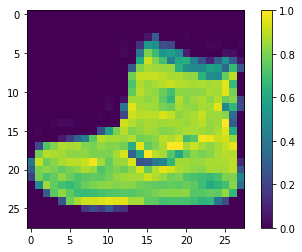

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images에서 처음 25개의 이미지와 그 아래 클래스 이름을 같이 출력해봅니다.

클래스 이름은 데이터셋에 포함되어 있지 않기 때문에, 별도의 변수를 만들어 저장합니다.

|레이블|	클래스|
|------|---------|
|0	|T-shirt/top|
|1	|Trouser|
|2	|Pullover|
|3	|Dress|
|4	|Coat|
|5	|Sandal|
|6	|Shirt|
|7	|Sneaker|
|8	|Bag|
|9	|Ankle boot|

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

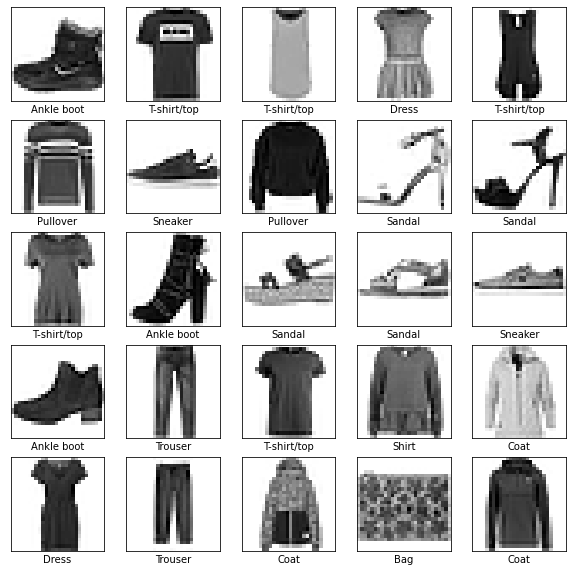

In [7]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)   # binary colormap을 사용하여 그린다.
    plt.xlabel(class_names[train_labels[i]])
plt.show()


### 3️⃣ 모델 구성

Sequential() 클래스를 이용하여 신경망 모델을 순서대로 구성합니다.

여기서 신경망의 기본 구성 요소는 층(layer)입니다. 층은 주입된 데이터에서 표현을 추출합니다.

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

총 3개의 레이어로 구성된 신경망 모델로,

* 1번째 레이어는 2차원 배열(**28X28 픽셀**)의 이미지를 28 * 28 = 784 픽셀의 1차원 배열로 변환합니다.
* 2번째 레이어는 펼친 784개의 값을 128개의 값으로 인코딩 해주는 과정으로, 활성함수는 ReLU를 사용하였습니다.
* 3번째 레이어는 무시된 값을 제외한 뉴런 중 10개의 값을 출력하는데, 활성함수는 softmax를 사용하였습니다.(Fashion-MNIST데이터셋은 0 ~ 9의 총 10개의 클래스가 존재하므로)


### 4️⃣ 모델 컴파일

모델을 모두 작성했으니, 컴파일해줍니다.

모델의 손실함수를 정의하고, 정한 손실함수로 얻은 손실값을 통해 모델의 파라미터를 조정하는 옵티마이저 등을 정의합니다.

* 손실함수(Loss Function) : 훈련하는 동안 모델의 오차를 측정합니다. 모델 학습이 올바른 방향으로 향하도록 이 함수를 최소화하해야 합니다.
* 옵티마이저(Optimizer) : 데이터와 손실함수를 바탕으로 모델의 업데이트 방법을 결정합니다.
* 지표(Metrics) : 훈련 단계와 테스트 단계를 모니터링 하기 위해 사용됩니다. (정확도 : 올바르게 분류된 이미지 비율)

In [9]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

모델의 학습 방법 중 Adam 옵티마이저를 사용했으며, 다중 클래스 분류를 다루고 있기 때문에 categorical_crossentropy를 손실함수로 사용합니다.

이 손실함수는 softmax 활성화함수와 짝을 이루는 손실함수입니다.

그리고, 모델 평가 지표로는 정확도를 구하는 accuracy를 추가합니다.


### 5️⃣ 최종 모델 구조 확인

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 6️⃣ 모델 훈련

모델을 정의하고 컴파일도 완료했으니, 학습을 시킬 차례입니다.
* 입력 데이터 : x_train
* 정답 데이터 : y_train
* epochs : 학습 반복 횟수
* batch_size : 몇 개의 샘플로 가중치를 계산할 것인지(100가지에서 batch_size가 100이면 전체를 다 계산)

In [11]:
model_history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 688us/step - loss: 0.5015 - accuracy: 0.8243 - val_loss: 0.4157 - val_accuracy: 0.8503
Epoch 2/5
1875/1875 [==============================] - 1s 632us/step - loss: 0.3740 - accuracy: 0.8648 - val_loss: 0.3737 - val_accuracy: 0.8649
Epoch 3/5
1875/1875 [==============================] - 1s 684us/step - loss: 0.3347 - accuracy: 0.8774 - val_loss: 0.3688 - val_accuracy: 0.8637
Epoch 4/5
1875/1875 [==============================] - 1s 640us/step - loss: 0.3117 - accuracy: 0.8856 - val_loss: 0.3514 - val_accuracy: 0.8766
Epoch 5/5
1875/1875 [==============================] - 1s 632us/step - loss: 0.2918 - accuracy: 0.8917 - val_loss: 0.3530 - val_accuracy: 0.8749


테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가합니다.

verbose : 학습 중 출력되는 문구를 설정하는 파라미터입니다.
* 0 : 출력 X
* 1 : 훈련의 진행도를 보여주는 진행 막대를 나타냅니다.
* 2 : 손실 정보를 출력해줍니다.

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test Accuracy : {:.4f}'.format(test_acc))

313/313 - 0s - loss: 0.3530 - accuracy: 0.8749
Test Accuracy : 0.8749


테스트 데이터의 정확도가 훈련 세트의 정확도보다 조금 낮습니다. 훈련 세트와 테스트 세트의 정확도 차이는 **과대적합(Overfitting)** 때문에 작용합니다. 
* 과대적합 : 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상

### 7️⃣ 훈련 결과 시각화

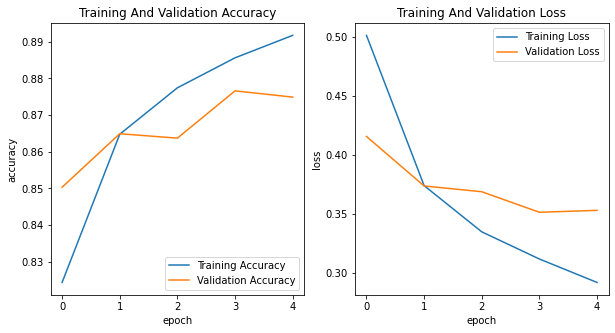

In [13]:
epochs = 5
plt.figure(figsize=(10, 5))

# 1. Training And Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(epochs), model_history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.title('Training And Validation Accuracy')

# 2. Training And Validation Loss
plt.subplot(1, 2, 2)
plt.plot(range(epochs), model_history.history['loss'], label='Training Loss')
plt.plot(range(epochs), model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.title('Training And Validation Loss')
plt.show()

위의 훈련 결과 시각화 데이터에서도 볼 수 있듯이 특정 지점에서 **과적합**이 발생해 정체가 발생하는 것을 확인할 수 있습니다.

### 8️⃣ 예측 만들기

훈련된 모델을 사용하여 이미지에 대한 예측을 만들 수 있습니다.

In [14]:
predictions = model.predict(test_images)

위의 predictions는 test_images에 있는 각 이미지의 레이블을 예측했습니다.

In [15]:
# 첫 번째 예측 확인
predictions[0]

array([6.1040200e-06, 2.8852369e-07, 2.1117361e-07, 1.8797499e-08,
       4.9756432e-07, 9.3208579e-03, 7.2319317e-06, 6.8147913e-02,
       3.1279894e-06, 9.2251378e-01], dtype=float32)

이 예측은 10개의 숫자 배열로 나타나며, 각 클래스에 대한 신뢰도를 나타냅니다. 가장 높은 신뢰도를 가진 레이블을 찾아봅니다.

In [16]:
np.argmax(predictions[0])

9

모델은 이 이미지가 앵클 부츠(class_name[9])라고 확신하고 있습니다. 이 값이 맞는지 테스트 레이블을 확인해 봅니다.

In [17]:
test_labels[0]

9

동일한 값이 나온다는 것을 알 수 있고, 10개 클래스에 대한 예측을 모두 그래프로 표현해봅니다.

* plot_image : 원소의 이미지를 나타내고, 예측 데이터와 실제 정답 데이터를 비교하여 글자색을 다르게 하여 나타내줍니다.
* plot_value_array : 10개의 클래스별로 신뢰도의 점수 배열을 표현해줍니다.

In [18]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label], color=color))
    
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


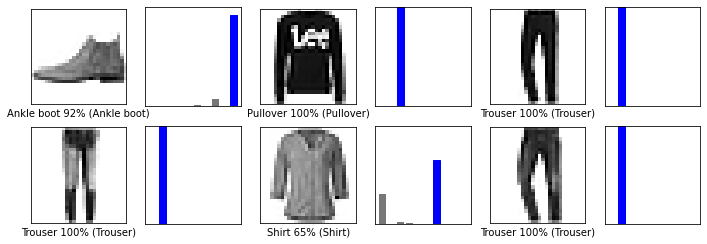

In [19]:
row, col = 2, 3
plt.figure(figsize=(2*2*col, 2*row))
for i in range(6):
    plt.subplot(row, 2*col, 2*i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(row, 2*col, 2*i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

마지막으로, 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만듭니다.

In [20]:
img = test_images[0]
print(img.shape)

(28, 28)


tf.keras  모델은 한 번에 샘플의 묶음 또는 배치로 예측을 만드는데 최적화되어있기 때문에, 하나의 이미지를 사용할 때도 2차원 배열로 만들어야 합니다.

In [21]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


이제, 이 이미지의 예측을 만듭니다.

In [22]:
predictions_single = model.predict(img)
print(predictions_single)

[[6.1040087e-06 2.8852369e-07 2.1117361e-07 1.8797499e-08 4.9756432e-07
  9.3208486e-03 7.2319249e-06 6.8147913e-02 3.1279865e-06 9.2251378e-01]]


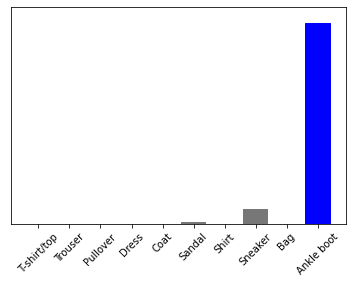

In [23]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

model.predict는 2차원 넘파이 배열을 반환하므로, 첫 번째 이미지의 예측을 선택합니다.

이전과 마찬가지로 모델의 예측은 레이블 9 입니다.

In [24]:
np.argmax(predictions_single[0])

9